In [75]:
import pandas as pd
import geopandas as gpd
pd.options.display.max_rows = 10

In [146]:
countries = gpd.read_file('ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

In [147]:
countries.head()

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
0,AFG,Afghanistan,Asia,34124811.0,64080.0,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,AGO,Angola,Africa,29310273.0,189000.0,"MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -..."
2,ALB,Albania,Europe,3047987.0,33900.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
3,ARE,United Arab Emirates,Asia,6072475.0,667200.0,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
4,ARG,Argentina,South America,44293293.0,879400.0,"MULTIPOLYGON (((-66.95992 -54.89681, -67.56244..."


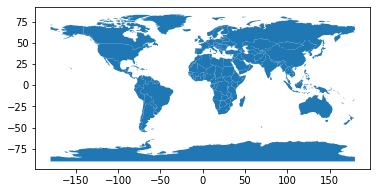

In [148]:
countries.plot()

In [149]:
countries.continent.value_counts()

Africa                     51
Asia                       47
Europe                     39
North America              18
South America              13
Oceania                     7
Seven seas (open ocean)     1
Antarctica                  1
Name: continent, dtype: int64

In [150]:
type(countries)

geopandas.geodataframe.GeoDataFrame

In [151]:
countries.geometry

0      POLYGON ((61.21082 35.65007, 62.23065 35.27066...
1      MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -...
2      POLYGON ((21.02004 40.84273, 20.99999 40.58000...
3      POLYGON ((51.57952 24.24550, 51.75744 24.29407...
4      MULTIPOLYGON (((-66.95992 -54.89681, -67.56244...
                             ...                        
172    MULTIPOLYGON (((167.84488 -16.46633, 167.51518...
173    POLYGON ((52.00001 19.00000, 52.78218 17.34974...
174    POLYGON ((19.89577 -24.76779, 20.16573 -24.917...
175    POLYGON ((23.21505 -17.52312, 22.56248 -16.898...
176    POLYGON ((29.43219 -22.09131, 28.79466 -21.639...
Name: geometry, Length: 177, dtype: geometry

In [152]:
type(countries.geometry)

geopandas.geoseries.GeoSeries

In [153]:
countries.geometry.area.sort_values(ascending=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


97        0.301516
38        0.374644
132       0.480314
39        0.613351
172       0.631326
          ...     
30      954.635341
168    1122.281921
27     1712.995228
135    2935.205205
6      6028.836194
Length: 177, dtype: float64

In [155]:
africa=countries[countries['continent']=='Africa']
#countries.columns

In [156]:
countries.isnull().sum().sort_values(ascending=True)

iso_a3        0
name          0
continent     0
pop_est       0
gdp_md_est    0
geometry      0
dtype: int64

In [197]:
cities=gpd.read_file('ne_110m_populated_places/ne_110m_populated_places.shp')

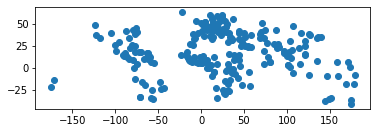

In [198]:
cities.plot()

In [160]:
rivers=gpd.read_file('ne_50m_rivers_lake_centerlines/ne_50m_rivers_lake_centerlines.shp')

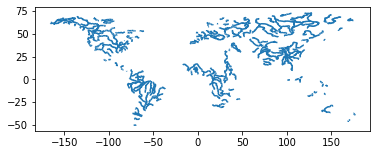

In [161]:
rivers.plot()

In [162]:
from shapely.geometry import Point,Polygon,LineString

In [163]:
p=Point(1,1)

In [164]:
print (p)

POINT (1 1)


In [165]:
polygon = Polygon([(1, 1), (2,2), (2, 1)])
print (polygon)

POLYGON ((1 1, 2 2, 2 1, 1 1))


In [167]:
cities

,SCALERANK,NATSCALE,LABELRANK,FEATURECLA,NAME,NAMEPAR,NAMEALT,DIFFASCII,NAMEASCII,ADM0CAP,...,name_ja,name_ko,name_nl,name_pl,name_sv,name_tr,name_vi,wdid_score,ne_id,geometry
0,8,10,3,Admin-0 capital,Vatican City,None,None,0,Vatican City,1.0,...,バチカン,바티칸 시국,Vaticaanstad,Watykan,Vatikanstaten,Vatikan,Thành Vatican,4,1159127243,POINT (12.45339 41.90328)
1,7,20,0,Admin-0 capital,San Marino,None,None,0,San Marino,1.0,...,サンマリノ市,산마리노,San Marino,San Marino,San Marino,San Marino,Thành phố San Marino,4,1159146051,POINT (12.44177 43.93610)
2,7,20,0,Admin-0 capital,Vaduz,None,None,0,Vaduz,1.0,...,ファドゥーツ,파두츠,Vaduz,Vaduz,Vaduz,Vaduz,Vaduz,4,1159146061,POINT (9.51667 47.13372)
3,6,30,8,Admin-0 capital alt,Lobamba,None,None,0,Lobamba,0.0,...,ロバンバ,로밤바,Lobamba,Lobamba,Lobamba,Lobamba,Lobamba,4,1159146343,POINT (31.20000 -26.46667)
4,6,30,8,Admin-0 capital,Luxembourg,None,None,0,Luxembourg,1.0,...,ルクセンブルク市,룩셈부르크,Luxemburg,Luksemburg,Luxemburg,Lüksemburg,Luxembourg,4,1159146437,POINT (6.13000 49.61166)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,0,600,1,Admin-1 capital,Rio de Janeiro,None,None,0,Rio de Janeiro,0.0,...,リオデジャネイロ,리우데자네이루,Rio de Janeiro,Rio de Janeiro,Rio de Janeiro,Rio de Janeiro,Rio de Janeiro,4,1159151619,POINT (-43.22697 -22.92308)
239,0,600,1,Admin-1 capital,São Paulo,None,Sao Paulo|Sio Paulo,0,Sao Paulo,0.0,...,サンパウロ,상파울루,São Paulo,São Paulo,São Paulo,São Paulo,São Paulo,4,1159151621,POINT (-46.62697 -23.55673)
240,0,600,3,Admin-1 capital,Sydney,None,None,0,Sydney,0.0,...,シドニー,시드니,Sydney,Sydney,Sydney,Sidney,Sydney,4,1159151623,POINT (151.18323 -33.91807)
241,0,600,0,Admin-0 capital,Singapore,None,None,0,Singapore,1.0,...,シンガポール,싱가포르,Singapore,Singapur,Singapore,Singapur,Singapore,4,1159151627,POINT (103.85387 1.29498)


In [168]:
countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [170]:

# remove Antartica, as the Mercator projection cannot deal with the poles
countries = countries[(countries['name'] != "Antarctica")]

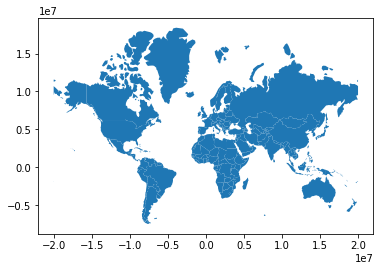

In [171]:
countries_utm=countries.to_crs(epsg=3395)
countries_utm.plot()

[(0, 40), (60, 100)]

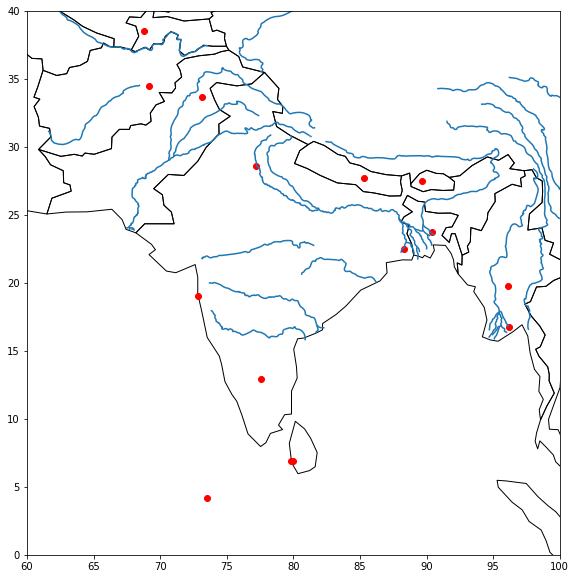

In [172]:
ax = countries.plot(edgecolor='k', facecolor='none', figsize=(20, 10))
rivers.plot(ax=ax)
cities.plot(ax=ax, color='red')
ax.set(xlim=(60, 100), ylim=(0, 40))

# Creating geodataframe from a pandas dataframe

In [173]:
df=pd.DataFrame({'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
     'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]})

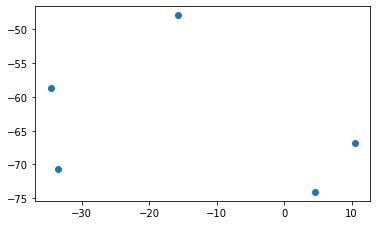

In [174]:
df['Coordinates']=list(zip(df.Latitude,df.Longitude))
df['Coordinates']=df['Coordinates'].apply(Point)
gdf=gpd.GeoDataFrame(df,geometry='Coordinates')
gdf.plot()

# spatial relationships

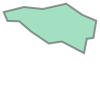

In [175]:
belgium=countries.loc[countries['name']=='Belgium','geometry'].squeeze()
belgium

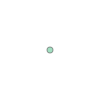

In [176]:
paris=cities.loc[cities['NAME']=='Paris','geometry'].squeeze()
paris

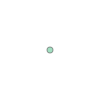

In [90]:
brussels=cities.loc[cities['NAME']=='Brussels','geometry'].squeeze()
brussels

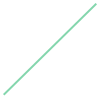

In [92]:
from shapely.geometry import LineString
line=LineString([paris,brussels])
line

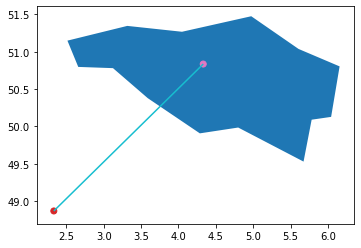

In [95]:
gpd.GeoSeries([belgium,paris,brussels,line]).plot(cmap='tab10')

In [96]:
brussels.within(belgium)

True

In [97]:
belgium.contains(brussels)

True

In [98]:
brussels.within(paris)

False

In [99]:
paris.contains(brussels)

False

In [106]:
belgium.contains(line)

False

In [108]:
line.intersects(belgium)

True

In [177]:
countries[countries.contains(paris)]

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
55,FRA,France,Europe,67106161.0,2699000.0,"MULTIPOLYGON (((2.51357 51.14851, 2.65842 50.7..."


In [178]:
amazon=rivers[rivers['name']=='Amazonas'].geometry.squeeze()

In [179]:
countries[countries.crosses(amazon)]

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
22,BRA,Brazil,South America,207353391.0,3081000.0,"POLYGON ((-57.62513 -30.21629, -56.29090 -28.8..."
35,COL,Colombia,South America,47698524.0,688000.0,"POLYGON ((-66.87633 1.25336, -67.06505 1.13011..."
124,PER,Peru,South America,31036656.0,410400.0,"POLYGON ((-69.52968 -10.95173, -68.66508 -12.5..."


In [113]:
type(amazon)

shapely.geometry.linestring.LineString

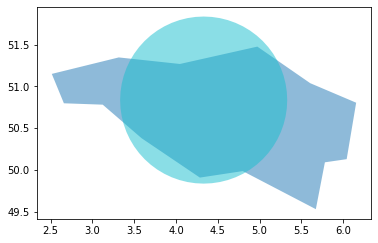

In [180]:
gpd.GeoSeries([belgium,brussels.buffer(1)]).plot(alpha=0.5,cmap='tab10')

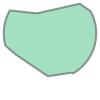

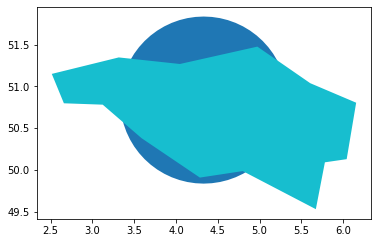

In [181]:
gpd.GeoSeries([brussels.buffer(1),belgium]).plot(cmap='tab10')

brussels.buffer(1).intersection(belgium)

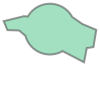

In [182]:

brussels.buffer(1).union(belgium)

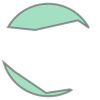

In [183]:

brussels.buffer(1).difference(belgium)

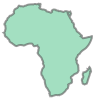

In [188]:
#african_countries=countries[countries['SOVEREIGNT']=='Africa']
african_countries=countries[countries['continent']=='Africa']
africa=african_countries.unary_union
africa

In [199]:
cities.name

0        Vatican City
1          San Marino
2               Vaduz
3             Lobamba
4          Luxembourg
            ...      
238    Rio de Janeiro
239         São Paulo
240            Sydney
241         Singapore
242         Hong Kong
Name: name, Length: 243, dtype: object

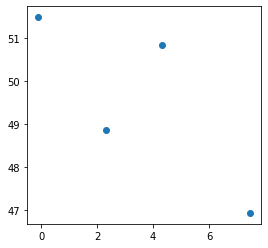

In [204]:
cities2=cities[cities['name'].isin(['Bern', 'Brussels', 'London', 'Paris'])].copy()
cities2['iso_a3']=['CHE', 'BEL', 'GBR', 'FRA']
cities2.plot()

In [216]:
#countries['iso_a3','name','continent']
countries2=countries[['iso_a3','name','continent']]
cities2.merge(countries2,on='iso_a3')

,name_x,geometry,iso_a3,name_y,continent
0,Bern,POINT (7.46698 46.91668),CHE,Switzerland,Europe
1,Brussels,POINT (4.33137 50.83526),BEL,Belgium,Europe
2,London,POINT (-0.11867 51.50194),GBR,United Kingdom,Europe
3,Paris,POINT (2.33139 48.86864),FRA,France,Europe


In [222]:
france=countries.loc[countries['name']=='France','geometry'].squeeze()

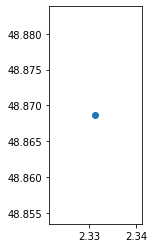

In [225]:
cities2[cities2.within(france)].plot()

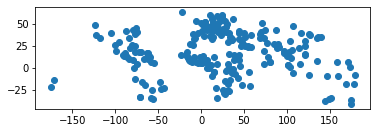

In [234]:
joined=gpd.sjoin(cities,countries,op='within',how='left')
joined
joined.plot()

In [233]:
joined['continent'].value_counts()

Asia             59
Africa           57
Europe           46
North America    26
South America    14
Oceania           8
Name: continent, dtype: int64

In [237]:
africa=countries[countries['continent']=='Africa']
type(africa)

geopandas.geodataframe.GeoDataFrame

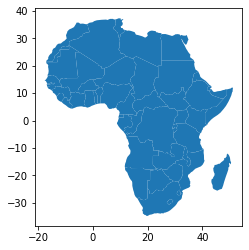

In [236]:
africa.plot()

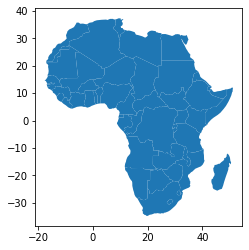

In [240]:
gpd.overlay(africa,cities,how='difference').plot()

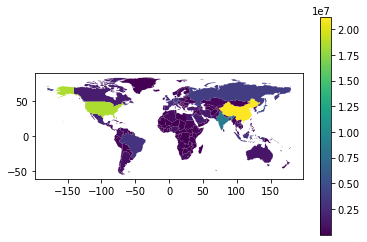

In [244]:
countries.plot(column='gdp_md_est',legend=True)

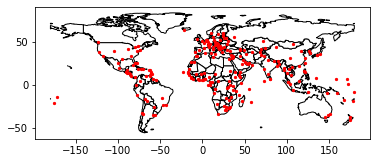

In [249]:
base=countries.plot(color='white',edgecolor='black')
joined.plot(ax=base,marker='o',color='red',markersize=5)

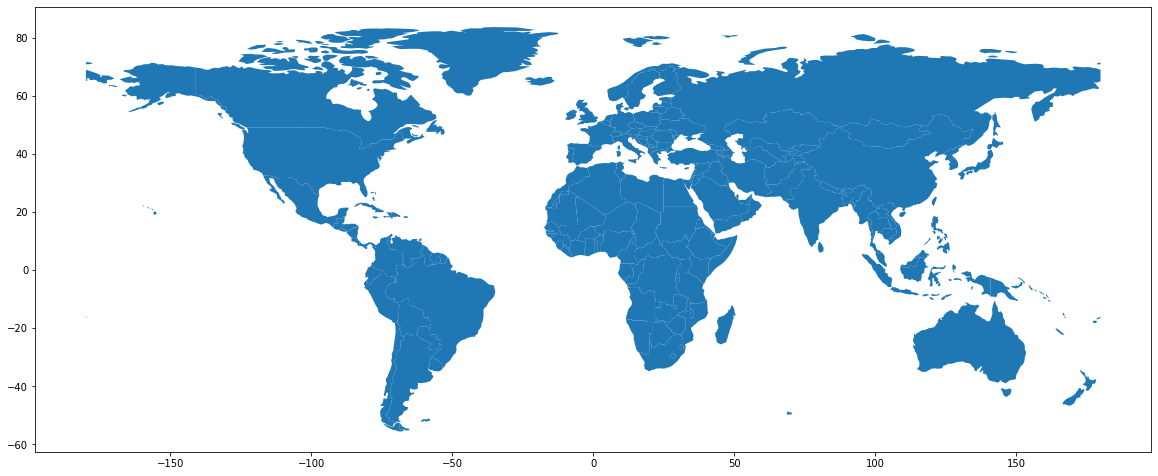

In [261]:
countries.plot(figsize=(20,20))

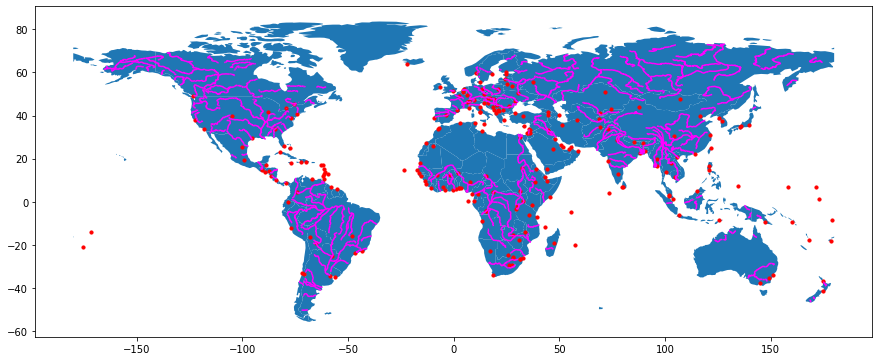

In [269]:
ax = countries.plot(figsize=(15, 15))
rivers.plot(ax=ax,color='magenta')
cities.plot(ax=ax, color='red', markersize=10)



In [270]:
df=gpd.read_file('berlin-districts.geojson')

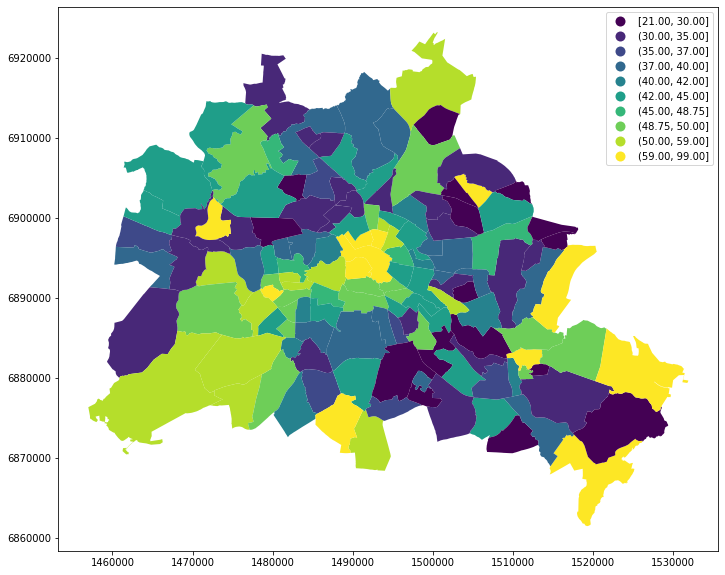

In [304]:
df.plot(figsize=(15,10),column='median_price',scheme='Quantiles',k=10,legend=True)

In [279]:
import seaborn as sbn

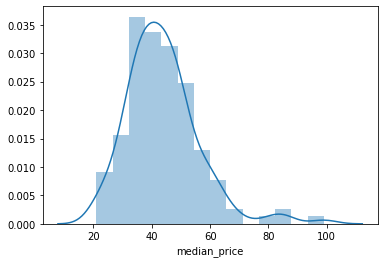

In [280]:
sbn.distplot(df['median_price'])

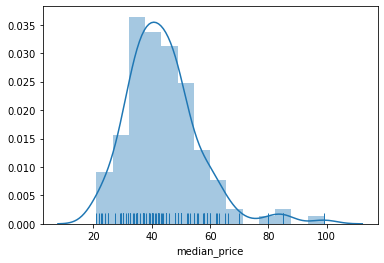

In [281]:
sbn.distplot(df['median_price'],rug=True)

In [300]:
import mapclassify as mc

In [301]:
mapclassify.__version__

'2.4.2'

In [305]:
ea5=mc.EqualInterval(df['median_price'],k=5)

In [306]:
ea5

EqualInterval         

   Interval      Count
----------------------
[21.00, 36.60] |    40
(36.60, 52.20] |    74
(52.20, 67.80] |    19
(67.80, 83.40] |     2
(83.40, 99.00] |     3

In [307]:
ea5.yb

array([1, 2, 1, 4, 0, 0, 0, 1, 1, 2, 1, 1, 1, 2, 2, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 1, 2, 2, 2, 1, 1, 1, 0, 1, 0, 0,
       1, 4, 1, 0, 0, 1, 1, 1, 0, 3, 1, 1, 0, 1, 3, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 2, 2, 1, 2, 1, 0, 2, 1, 2, 0, 1, 1, 1, 1, 0, 2,
       4, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 2, 0, 1, 0])

Text(0.5, 1, 'Custom')

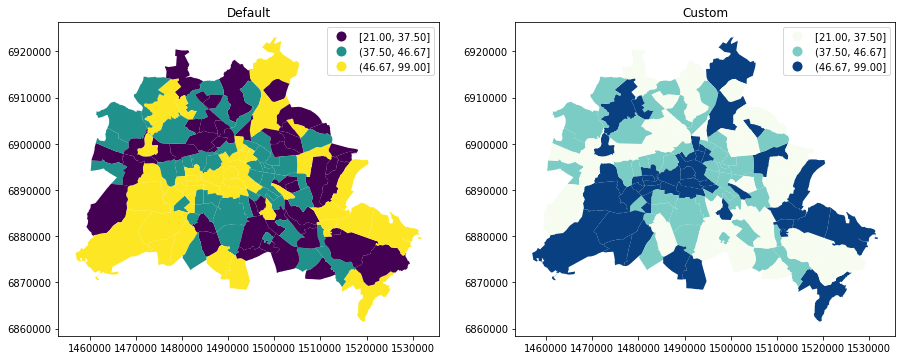

In [322]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,2,figsize=(15,10))
df.plot(column='median_price',scheme='Quantiles',ax=ax[0],legend=True,k=3)
ax[0].set_title('Default')
df.plot(column='median_price',scheme='Quantiles',ax=ax[1],legend=True,k=3,cmap='GnBu')
ax[1].set_title('Custom')